In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import rc, font_manager

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.simplefilter(action='ignore', category=FutureWarning)

# https://namu.wiki/w/2018-2019%EB%85%84%20%EC%97%B0%EC%87%84%20%EC%9D%8C%EC%9B%90%20%EC%82%AC%EC%9E%AC%EA%B8%B0%20%ED%8C%8C%EB%8F%99

# 참고하여 사재기 의심을 받았던 가수와 아닌 가수 비교

- 댓글의 반응은 어떨까?
- 멜론 기능인 팬맺기가 아이돌 팬덤과 비교를 할 수 있을까?

In [3]:
data = pd.read_csv('final.csv')

In [159]:
df = data.copy()

In [160]:
Hoarding_artist = ['송하예', '벤', '우디 (Woody)', '숀 (SHAUN)', '닐로(Nilo)', '황인욱', '임재현', '장덕철', '김나영', '엔플라잉 (N.Flying)']

In [161]:
for i in Hoarding_artist:
   df = df[df['artist'] != i]

In [162]:
df.reset_index(drop=True, inplace=True)

In [163]:
chart = df.groupby(['artist', 'title'])[['song_like', 'rank', 'num_song_review', 'artist_likes', 'opinion','chartin']].mean()
chart.reset_index(inplace=True)
chart.head()

,artist,title,song_like,rank,num_song_review,artist_likes,opinion,chartin
0,#Gun,미친놈 (Feat. 제시),38204.000000,9.000000,60.0,3253.0,0.903226,2.000000
1,(여자)아이들,Allergy,65058.000000,10.000000,578.0,136819.0,0.925862,17.500000
2,(여자)아이들,Nxde,162829.230769,4.923077,2276.0,136815.0,0.892754,45.230769
3,(여자)아이들,TOMBOY,241382.000000,3.277778,635.0,116493.0,0.964724,76.222222
4,(여자)아이들,퀸카 (Queencard),133858.000000,2.937500,2190.0,136819.0,0.893471,52.500000


In [164]:
artist_like = data.groupby(['artist'])[['song_like', 'rank', 'num_song_review', 'artist_likes', 'opinion','chartin']].mean()
artist_like.reset_index(inplace=True)
artist_like.head()

,artist,song_like,rank,num_song_review,artist_likes,opinion,chartin
0,#Gun,38204.000000,9.000000,60.000000,3253.000000,0.903226,2.000000
1,(여자)아이들,178234.693878,3.877551,1575.795918,129351.244898,0.920777,57.857143
2,10CM,141494.411765,5.823529,301.470588,187759.529412,0.923858,15.000000
3,"10CM, BIG Naughty (서동현)",114680.000000,9.000000,333.000000,270931.000000,0.874214,8.000000
4,"15& (박지민, 백예린)",38541.666667,6.111111,38.000000,13245.000000,0.923380,8.333333


In [165]:
Top10 = list(data['artist'].value_counts()[:10].index)

In [166]:
artist = Hoarding_artist + Top10

In [167]:
all = list(artist_like['artist'].unique())

In [168]:
for i in artist:
    all.remove(i)

In [169]:
for i in all:
    artist_like = artist_like[artist_like['artist'] != i]

In [170]:
artist_like

,artist,song_like,rank,num_song_review,artist_likes,opinion,chartin
8,AKMU (악뮤),172586.654321,5.691358,755.790123,238015.135802,0.946802,35.172840
20,BLACKPINK,207054.555556,5.250000,2350.138889,238797.416667,0.914996,40.305556
31,Crush,209856.421429,5.650000,1176.157143,208713.442857,0.946217,36.885714
49,IVE (아이브),210936.173077,4.596154,2810.528846,88135.144231,0.894389,82.846154
72,NewJeans,231719.406667,4.700000,2523.133333,137750.566667,0.897884,119.933333
85,TWICE (트와이스),164626.885714,4.809524,1720.514286,196581.885714,0.899803,35.571429
124,김나영,123668.000000,3.900000,493.600000,61460.600000,0.860956,14.500000
141,닐로(Nilo),263403.000000,4.071429,9222.000000,19322.000000,0.767183,205.500000
188,방탄소년단,349947.796748,5.398374,10048.048780,715348.747967,0.909198,60.227642
199,벤,152239.758621,4.965517,973.103448,80610.689655,0.863836,44.896552


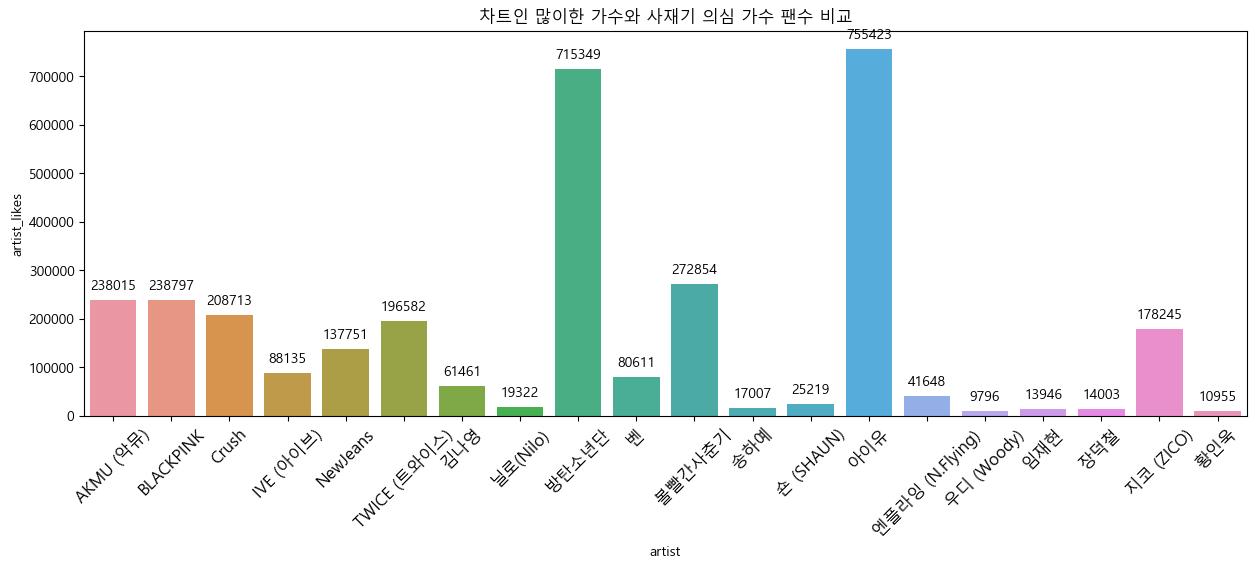

In [171]:
plt.figure(figsize=(15, 5)) 
g = sns.barplot(data= artist_like,x= "artist",y= "artist_likes", ci=None)
ax = g

#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points')
    
plt.title('차트인 많이한 가수와 사재기 의심 가수 팬수 비교')
plt.xticks(fontsize=12, rotation=45)
plt.show()

In [172]:
artist_df = artist_like.copy()
Hoarding_df = artist_like.copy()

In [173]:
for i in Hoarding_artist:
    artist_df = artist_df[artist_df['artist'] != i]

for i in Top10:
    Hoarding_df = Hoarding_df[Hoarding_df['artist'] != i]

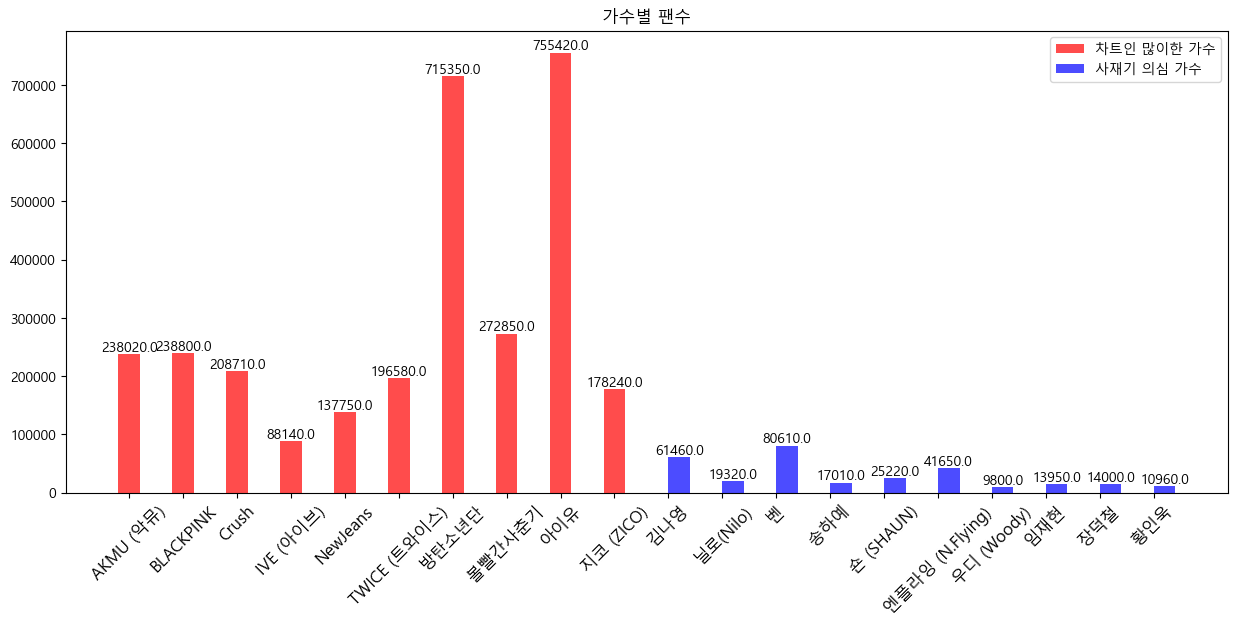

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터 생성
categories1 = artist_df['artist']
values1 = artist_df['artist_likes']

categories2 = Hoarding_df['artist']
values2 = Hoarding_df['artist_likes']

# 그림 생성
fig, ax = plt.subplots(figsize=(15, 6))

# 첫 번째 막대 차트
bar1 = ax.bar(categories1, values1, width=0.4, align='center', label='차트인 많이한 가수', alpha=0.7, color='Red')

# 두 번째 막대 차트
bar2 = ax.bar(categories2, values2, width=0.4, align='edge', label='사재기 의심 가수', alpha=0.7, color='Blue')


for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, -1), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, -1), ha='center', va='bottom')

# 범례 추가
ax.legend()
plt.xticks(fontsize=12, rotation=45)
plt.title('가수별 팬수')
# 그림 표시
plt.show()


In [190]:
Top10_song = list(data['title'].value_counts()[:11].index)

In [191]:
Top10_song

['Beautiful',
 'Candy',
 'Hype boy',
 'Peaches (Feat. Daniel Caesar & Giveon)',
 'Dynamite',
 'Attention',
 '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야',
 'LOVE DIVE',
 '옥탑방 (Rooftop)',
 '에잇(Prod.&Feat. SUGA of BTS)',
 'After LIKE']

In [192]:
df1 = data.groupby(['artist', 'title'])[['song_like', 'rank', 'num_song_review', 'artist_likes', 'opinion','chartin']].mean().reset_index()

In [193]:
all_song = list(data.title.unique())

In [194]:
for i in Top10_song:
    all_song.remove(i)

In [195]:
top_song_df = df1.copy()
Hoarding_song_df = df1.copy()

In [197]:
for i in all_song:
    top_song_df = top_song_df[top_song_df['title'] != i]

In [198]:
top_song_df

,artist,title,song_like,rank,num_song_review,artist_likes,opinion,chartin
99,Crush,Beautiful,238974.000000,5.307692,1453.0,209240.5,0.947988,44.000000
143,IVE (아이브),After LIKE,236303.000000,5.111111,3566.0,88131.0,0.898923,91.000000
147,IVE (아이브),LOVE DIVE,242579.142857,5.035714,2769.0,88144.0,0.916230,125.500000
154,Justin Bieber,Peaches (Feat. Daniel Caesar & Giveon),223282.000000,5.500000,1010.0,96833.0,0.854123,78.055556
183,NCT DREAM,Candy,167505.750000,8.250000,7403.0,219416.0,0.894703,27.500000
187,NewJeans,Attention,234652.354839,5.935484,2711.0,137750.0,0.902503,114.709677
191,NewJeans,Hype boy,280090.571429,4.693878,2320.0,137748.0,0.911304,175.000000
258,Wanna One (워너원),Beautiful,239244.000000,6.000000,1453.0,209240.5,0.947988,10.500000
467,방탄소년단,Dynamite,458392.085714,3.228571,19080.0,715340.0,0.903291,122.400000
491,백현 (BAEKHYUN),Candy,141191.000000,9.000000,7403.0,219416.0,0.894703,0.000000


In [199]:
top_song_df = top_song_df.drop(index=491,axis=0)
top_song_df = top_song_df.drop(index=708,axis=0)

In [200]:
all_song = list(Hoarding_song_df['artist'].unique())

In [201]:
for i in Hoarding_artist:
    all_song.remove(i)

for i in all_song:
    Hoarding_song_df = Hoarding_song_df[Hoarding_song_df['artist'] != i]

In [202]:
Hoarding_song_df = Hoarding_song_df.drop(index=330,axis=0)
Hoarding_song_df = Hoarding_song_df.drop(index=512,axis=0)
Hoarding_song_df = Hoarding_song_df.drop(index=513,axis=0)
Hoarding_song_df = Hoarding_song_df.drop(index=511,axis=0)

In [203]:
Hoarding_song_df

,artist,title,song_like,rank,num_song_review,artist_likes,opinion,chartin
329,김나영,솔직하게 말해서 나,157402.000000,3.833333,800.0,61465.0,0.823815,18.500000
356,닐로(Nilo),지나오다,263403.000000,4.071429,9222.0,19322.0,0.767183,205.500000
510,벤,180도,170009.000000,3.444444,1869.0,80612.0,0.822961,31.111111
514,벤,헤어져줘서 고마워,137410.000000,3.714286,981.0,80609.0,0.820059,19.000000
597,송하예,니 소식,205461.000000,6.000000,1478.0,17007.0,0.890601,82.500000
598,송하예,새 사랑,100235.000000,5.166667,1335.0,17007.0,0.822795,20.666667
599,숀 (SHAUN),Way Back Home,364135.357143,3.428571,11635.0,25219.0,0.780203,66.500000
708,엔플라잉 (N.Flying),옥탑방 (Rooftop),289481.000000,4.285714,6619.0,41648.0,0.840740,75.000000
727,우디 (Woody),Nostalgia,45662.000000,7.000000,258.0,9794.0,0.852761,21.000000
728,우디 (Woody),사막에서 꽃을 피우듯,52491.000000,6.500000,752.0,9794.0,0.832335,41.500000


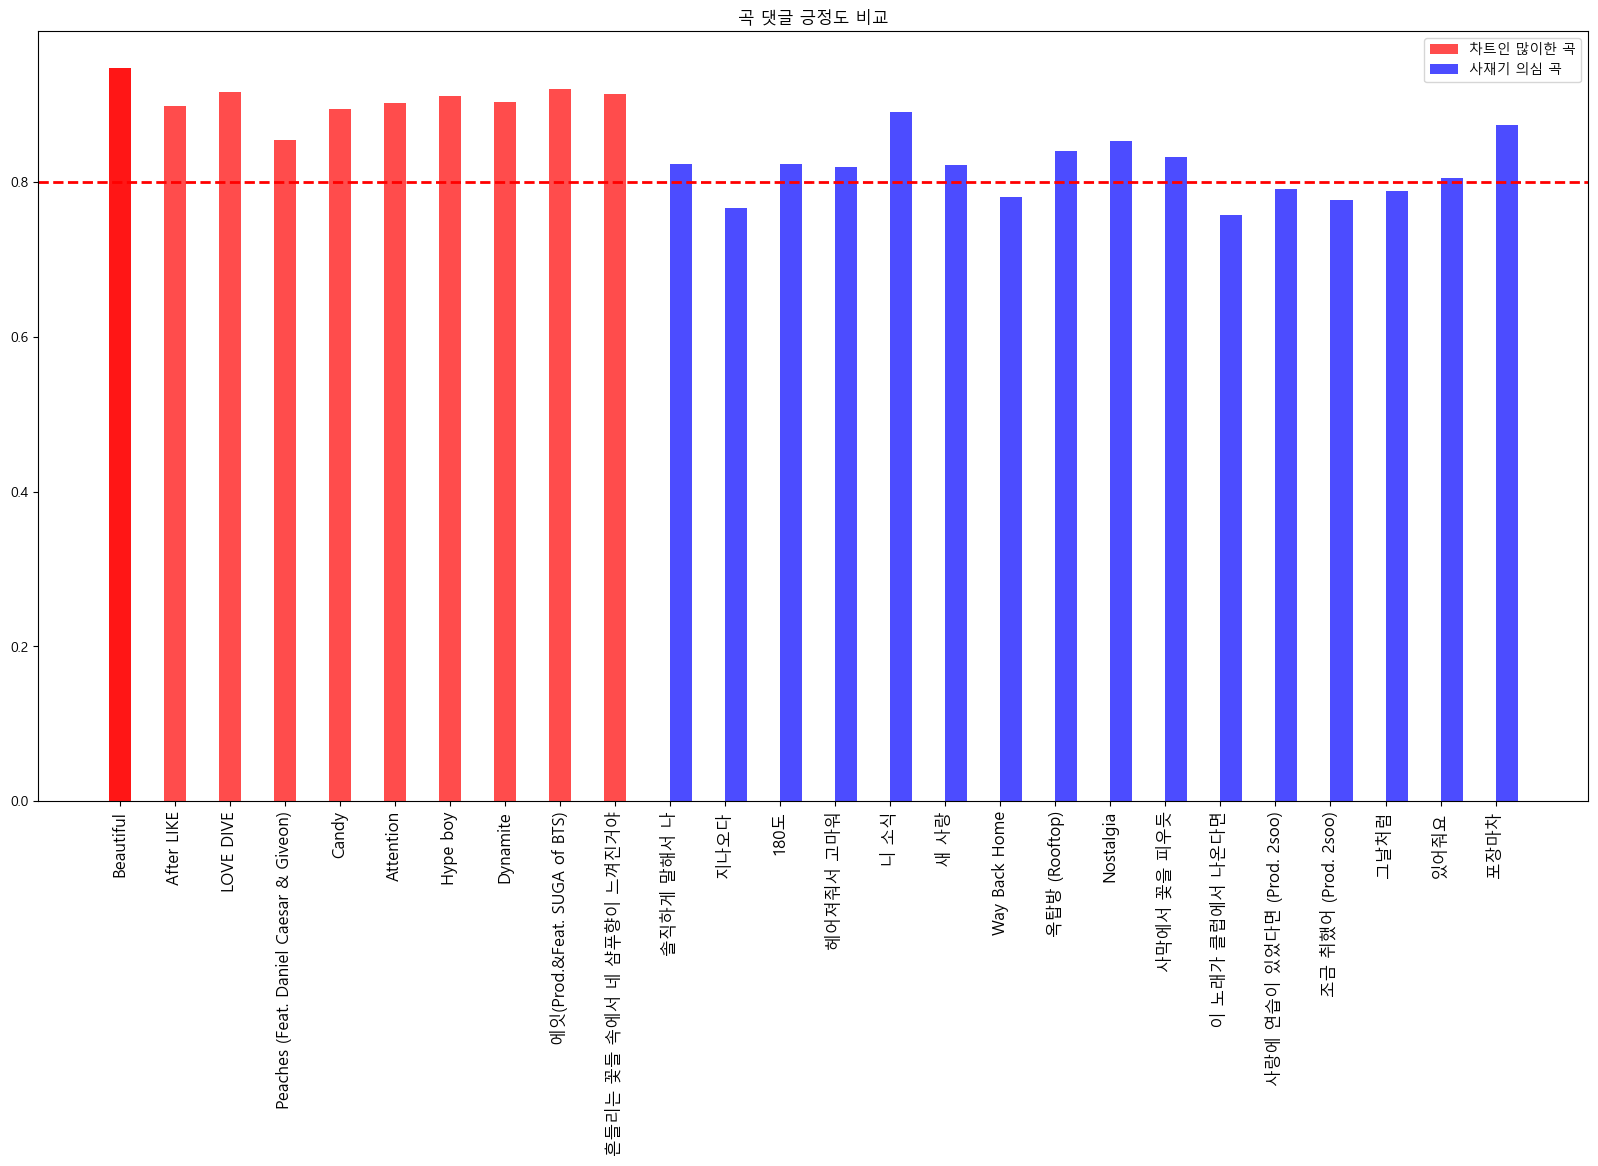

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터 생성
categories1 = top_song_df['title']
values1 = top_song_df['opinion']

categories2 = Hoarding_song_df['title']
values2 = Hoarding_song_df['opinion']

# 그림 생성
fig, ax = plt.subplots(figsize=(20, 10))

# 첫 번째 막대 차트
ax.bar(categories1, values1, width=0.4, align='center', label='차트인 많이한 곡', alpha=0.7, color='Red')

# 두 번째 막대 차트
ax.bar(categories2, values2, width=0.4, align='edge', label='사재기 의심 곡', alpha=0.7, color='Blue')

ax.axhline(y=0.8, color='red', linestyle='--', linewidth=2)

# 범례 추가
ax.legend()
plt.xticks(fontsize=12, rotation=90)
plt.title('곡 댓글 긍정도 비교')
# 그림 표시
plt.show()


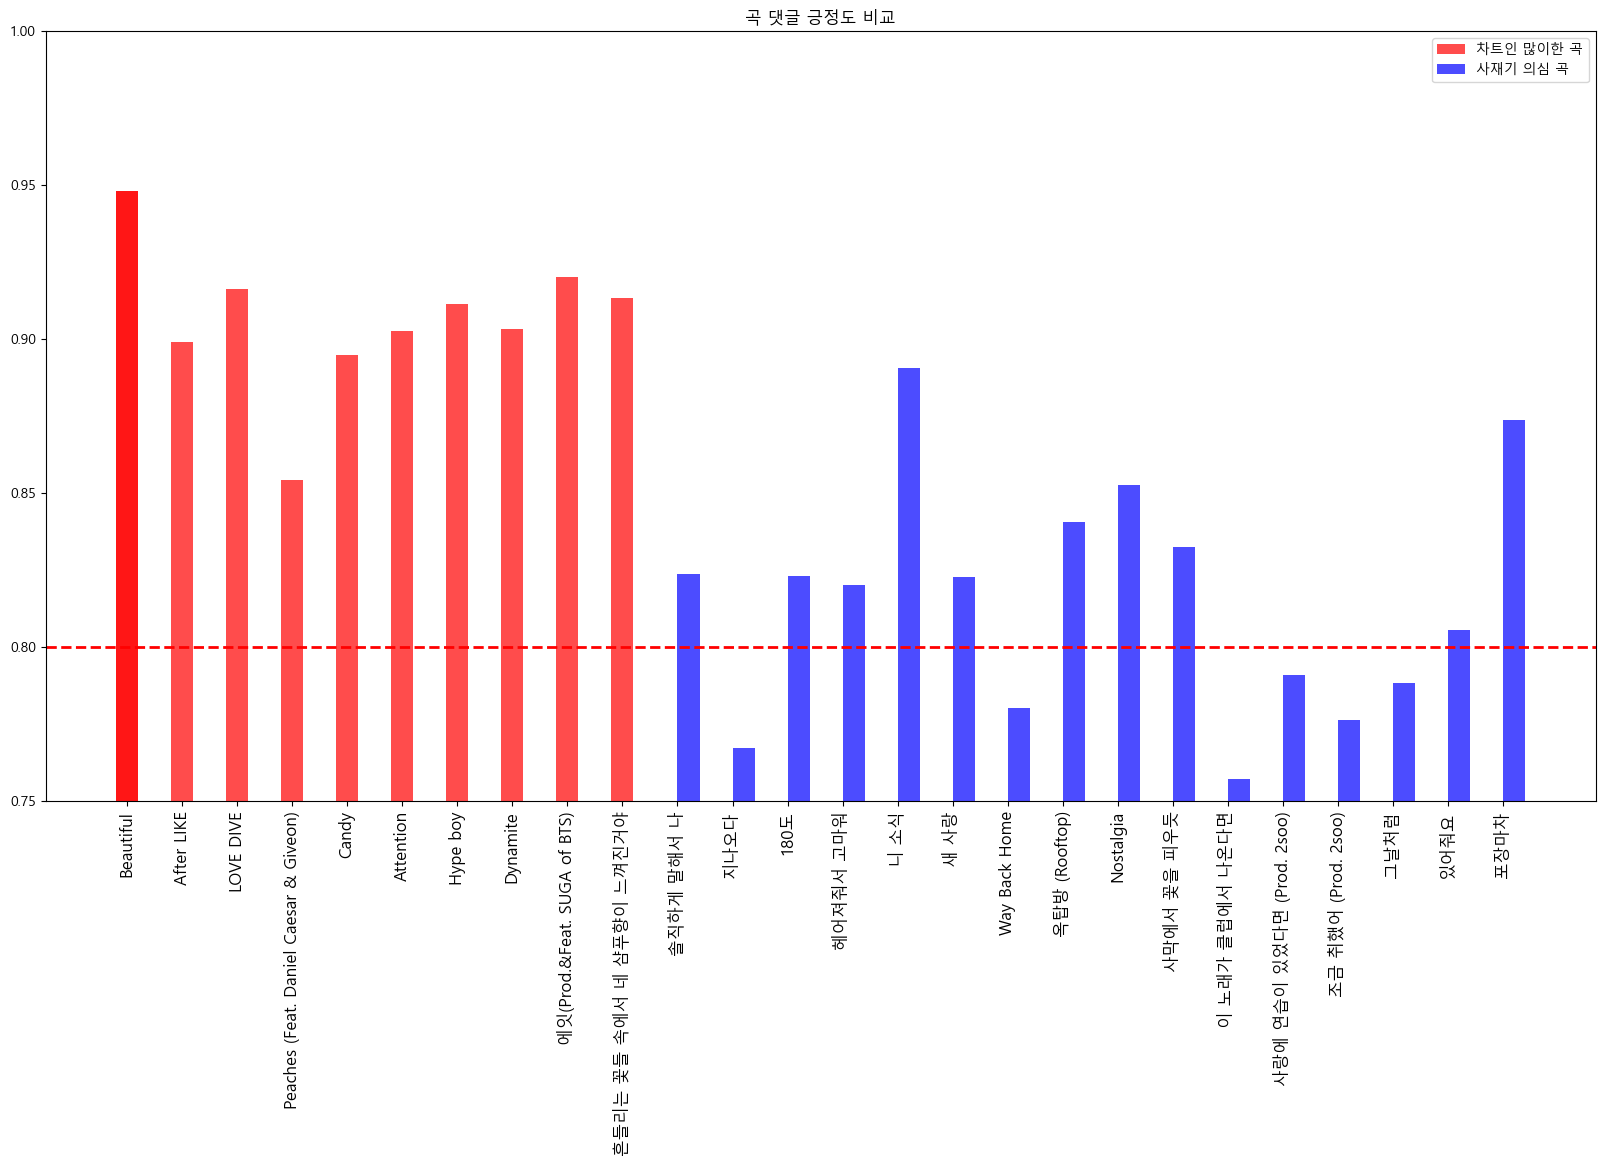

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터 생성
categories1 = top_song_df['title']
values1 = top_song_df['opinion']

categories2 = Hoarding_song_df['title']
values2 = Hoarding_song_df['opinion']

# 그림 생성
fig, ax = plt.subplots(figsize=(20, 10))

# 첫 번째 막대 차트
ax.bar(categories1, values1, width=0.4, align='center', label='차트인 많이한 곡', alpha=0.7, color='Red')

# 두 번째 막대 차트
ax.bar(categories2, values2, width=0.4, align='edge', label='사재기 의심 곡', alpha=0.7, color='Blue')

ax.axhline(y=0.8, color='red', linestyle='--', linewidth=2)

# 범례 추가
ax.legend()
plt.xticks(fontsize=12, rotation=90)
ax.set_ylim(0.75, 1)  # 원하는 범위로 설정
plt.title('곡 댓글 긍정도 비교')
# 그림 표시
plt.show()


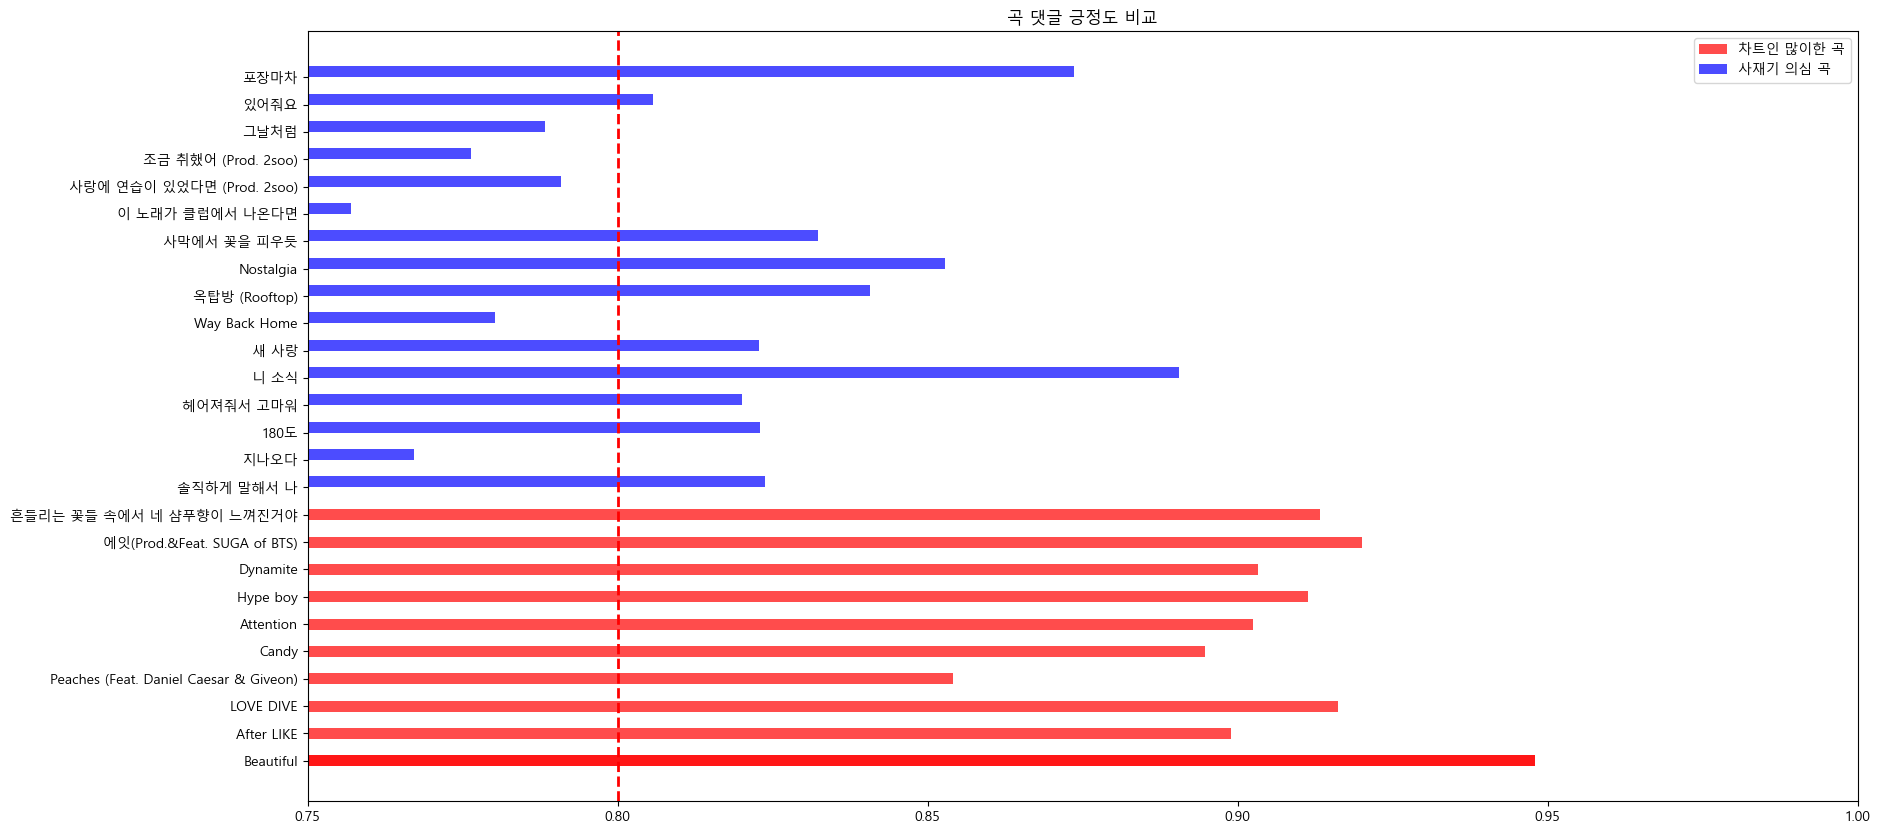

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터 생성
categories1 = top_song_df['title']
values1 = top_song_df['opinion']

categories2 = Hoarding_song_df['title']
values2 = Hoarding_song_df['opinion']

# 그림 생성
fig, ax = plt.subplots(figsize=(20, 10))

# 첫 번째 막대 차트
ax.barh(categories1, values1, height=0.4, align='center', label='차트인 많이한 곡', alpha=0.7, color='Red')

# 두 번째 막대 차트
ax.barh(categories2, values2, height=0.4, align='edge', label='사재기 의심 곡', alpha=0.7, color='Blue')

ax.axvline(x=0.8, color='red', linestyle='--', linewidth=2)

# 범례 추가
ax.legend()
# plt.xticks(fontsize=12, rotation=90)
ax.set_xlim(0.75, 1)  # 원하는 범위로 설정
plt.title('곡 댓글 긍정도 비교')
# 그림 표시
plt.show()
